In [1]:
import random
import numpy as np
import os



In [2]:
data_path = "../data/Persian_Car_Plates_YOLOV8"
train_path = os.path.join(data_path, "train")

In [3]:
size = (640,640)

# Load Data

In [5]:
from src.Dataset import CustomDatasetLocation as LocDataset

train_dataset = LocDataset(train_path,size=size)
len(train_dataset)

219

# Visualize Data

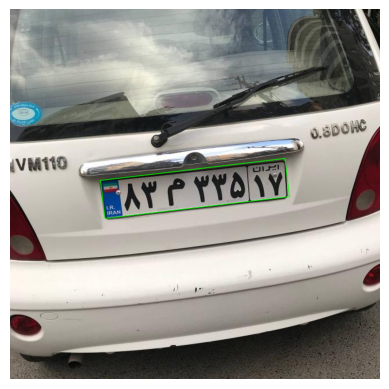

In [12]:
import cv2
import matplotlib.pyplot as plt

vizu_dataset = LocDataset(train_path, size=size, transform=None)

image, label = vizu_dataset[np.random.randint(len(train_dataset))]

cv2.polylines(image, [label.astype(np.int32)], isClosed=True, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)

plt.imshow(image)
plt.axis('off')
plt.show()

In [14]:
from ultralytics import YOLO

location_model = YOLO("../models/best_location.pt")

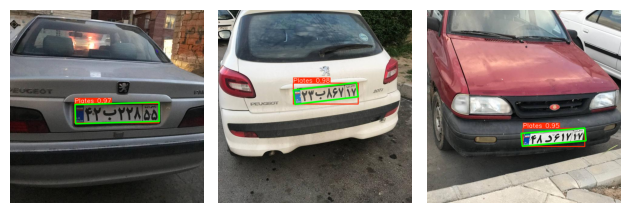

In [16]:
test_img = random.choices(vizu_dataset, k=3)
fig, axs = plt.subplots(1, len(test_img))
for ax, (x, y) in zip(axs, test_img):
    pred = location_model.predict([x], save=False, conf=0.5, iou=0.7,verbose=False)
    img = pred[0].plot()
    cv2.polylines(img, [y.astype(np.int32)], isClosed=True, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_AA)
    ax.imshow(img) 
    ax.axis('off')

plt.tight_layout()
plt.show()


New https://pypi.org/project/ultralytics/8.3.13 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.9 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2070, 7966MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/data/Persian_Car_Plates_YOLOV8/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=../models/yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

RuntimeError: Dataset '/data/Persian_Car_Plates_YOLOV8/data.yaml' error ❌ '/data/Persian_Car_Plates_YOLOV8/data.yaml' does not exist